In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('winemag-data-130k-v2 2.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
len(df)

129971

In [4]:
df.variety.describe()

count         129970
unique           707
top       Pinot Noir
freq           13272
Name: variety, dtype: object

## Find out how many null values exist and get rid of the features with the most null vals

In [5]:

df.isna().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [6]:
# region_2 and twitter handle have the most null values so dropping the column
df_cleaned1 = df.drop(['Unnamed: 0','region_2','taster_twitter_handle'],axis=1)
df_cleaned1

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,Roger Voss,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,Anna Lee C. Iijima,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [7]:
list(df_cleaned1.columns.values)

['country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'taster_name',
 'title',
 'variety',
 'winery']

In [8]:
rwo_df = pd.read_excel('Types of Wine - O, R, W.xlsx')
rwo_df.head()

,variety,color
0,Alvar Roxo,Orange
1,Ar110,Orange
2,Ar99,Orange
3,Barbarossa,Orange
4,Barbaroux,Orange


In [9]:
df_cleaned2 = df_cleaned1.merge(rwo_df, on='variety', how='left')
df_cleaned2.head()

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,color
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,White
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Red
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Orange
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,White
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Red


In [10]:
df_cleaned2.isna().sum()

country           63
description        0
designation    37474
points             0
price           8998
province          63
region_1       21253
taster_name    26245
title              0
variety            1
winery             0
color          19918
dtype: int64

In [11]:
df_cleaned2.describe(include= 'all')

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,color
count,129929,129992,92518,129992.000000,120994.000000,129929,108739,103747,129992,129991,129992,110074
unique,43,119955,37979,NaN,NaN,425,1229,19,118840,707,16757,3
top,US,"Stalky aromas suggest hay and green herbs, wit...",Reserve,NaN,NaN,California,Napa Valley,Roger Voss,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers,Red
freq,54512,3,2011,NaN,NaN,36249,4480,25516,11,13272,222,70747
mean,NaN,NaN,NaN,88.446851,35.361357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.039744,41.019738,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,86.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,91.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_cleaned3= df_cleaned2.drop(['description','designation','province' ,'region_1', 'title','variety', 'winery'],axis=1)
df_cleaned3.head()

,country,points,price,taster_name,color
0,Italy,87,NaN,Kerin O’Keefe,White
1,Portugal,87,15.0,Roger Voss,Red
2,US,87,14.0,Paul Gregutt,Orange
3,US,87,13.0,Alexander Peartree,White
4,US,87,65.0,Paul Gregutt,Red


In [13]:
df_cleaned3.isna().sum()

country           63
points             0
price           8998
taster_name    26245
color          19918
dtype: int64

In [14]:
df_cleaned4 = df_cleaned3.dropna()
len(df_cleaned4)

81558

In [15]:
df_cleaned4.describe(include='all')


,country,points,price,taster_name,color
count,81558,81558.000000,81558.000000,81558,81558
unique,40,NaN,NaN,19,3
top,US,NaN,NaN,Roger Voss,Red
freq,34274,NaN,NaN,16095,51936
mean,NaN,88.661443,36.546188,NaN,NaN
std,NaN,2.966901,44.771244,NaN,NaN
min,NaN,80.000000,4.000000,NaN,NaN
25%,NaN,87.000000,17.000000,NaN,NaN
50%,NaN,89.000000,26.000000,NaN,NaN
75%,NaN,91.000000,45.000000,NaN,NaN


# Potential target variables to Predict based on data above:
- color: there are 3 unique colors
- country: there are 7 unique countries
- points - below mean or above mean?
- price - below mean or above mean?
- taster name - based on the language they used?
- the variety of wine? - pinot noir etc (there are 434 total wine varieties)

## 2. Classification Tree - predict price

In [16]:
# implementing the tree using scikit learn
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import mean_squared_error
#import matplotlib.pyplot as plt
#import seaborn as sns

In [17]:
labels = df_cleaned4['price']
labels_removed_df = df_cleaned4.drop('price', axis=1, inplace=False)
labels_removed_df.head()

,country,points,taster_name,color
1,Portugal,87,Roger Voss,Red
2,US,87,Paul Gregutt,Orange
3,US,87,Alexander Peartree,White
4,US,87,Paul Gregutt,Red
5,Spain,87,Michael Schachner,Red


In [18]:
labels_removed_df.color = labels_removed_df.color.map({'Red': 0, 'White': 1, 'Orange': 2})
labels_removed_df.head()

,country,points,taster_name,color
1,Portugal,87,Roger Voss,0
2,US,87,Paul Gregutt,2
3,US,87,Alexander Peartree,1
4,US,87,Paul Gregutt,0
5,Spain,87,Michael Schachner,0


In [19]:
X= pd.get_dummies(labels_removed_df)
X.head()

,points,color,country_Argentina,country_Australia,country_Austria,country_Brazil,country_Bulgaria,country_Canada,country_Chile,country_China,...,taster_name_Kerin O’Keefe,taster_name_Lauren Buzzeo,taster_name_Matt Kettmann,taster_name_Michael Schachner,taster_name_Mike DeSimone,taster_name_Paul Gregutt,taster_name_Roger Voss,taster_name_Sean P. Sullivan,taster_name_Susan Kostrzewa,taster_name_Virginie Boone
1,87,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,87,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,87,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,87,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,87,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


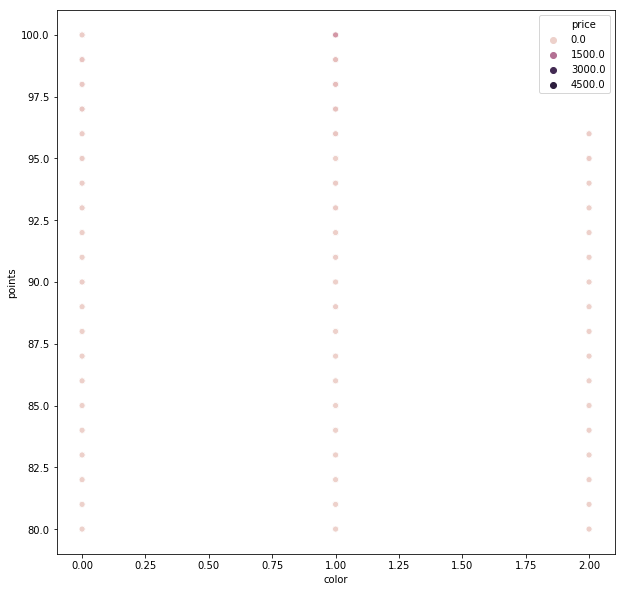

In [20]:
import seaborn as sns
fig = plt.figure(figsize = (10,10))
sns.scatterplot(x = X['color'], y = X['points'], hue = labels)

In [21]:
y = labels

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)#start off with a very small depth
from sklearn.tree import DecisionTreeClassifier
ctree=DecisionTreeClassifier(max_depth = 2)
ctree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

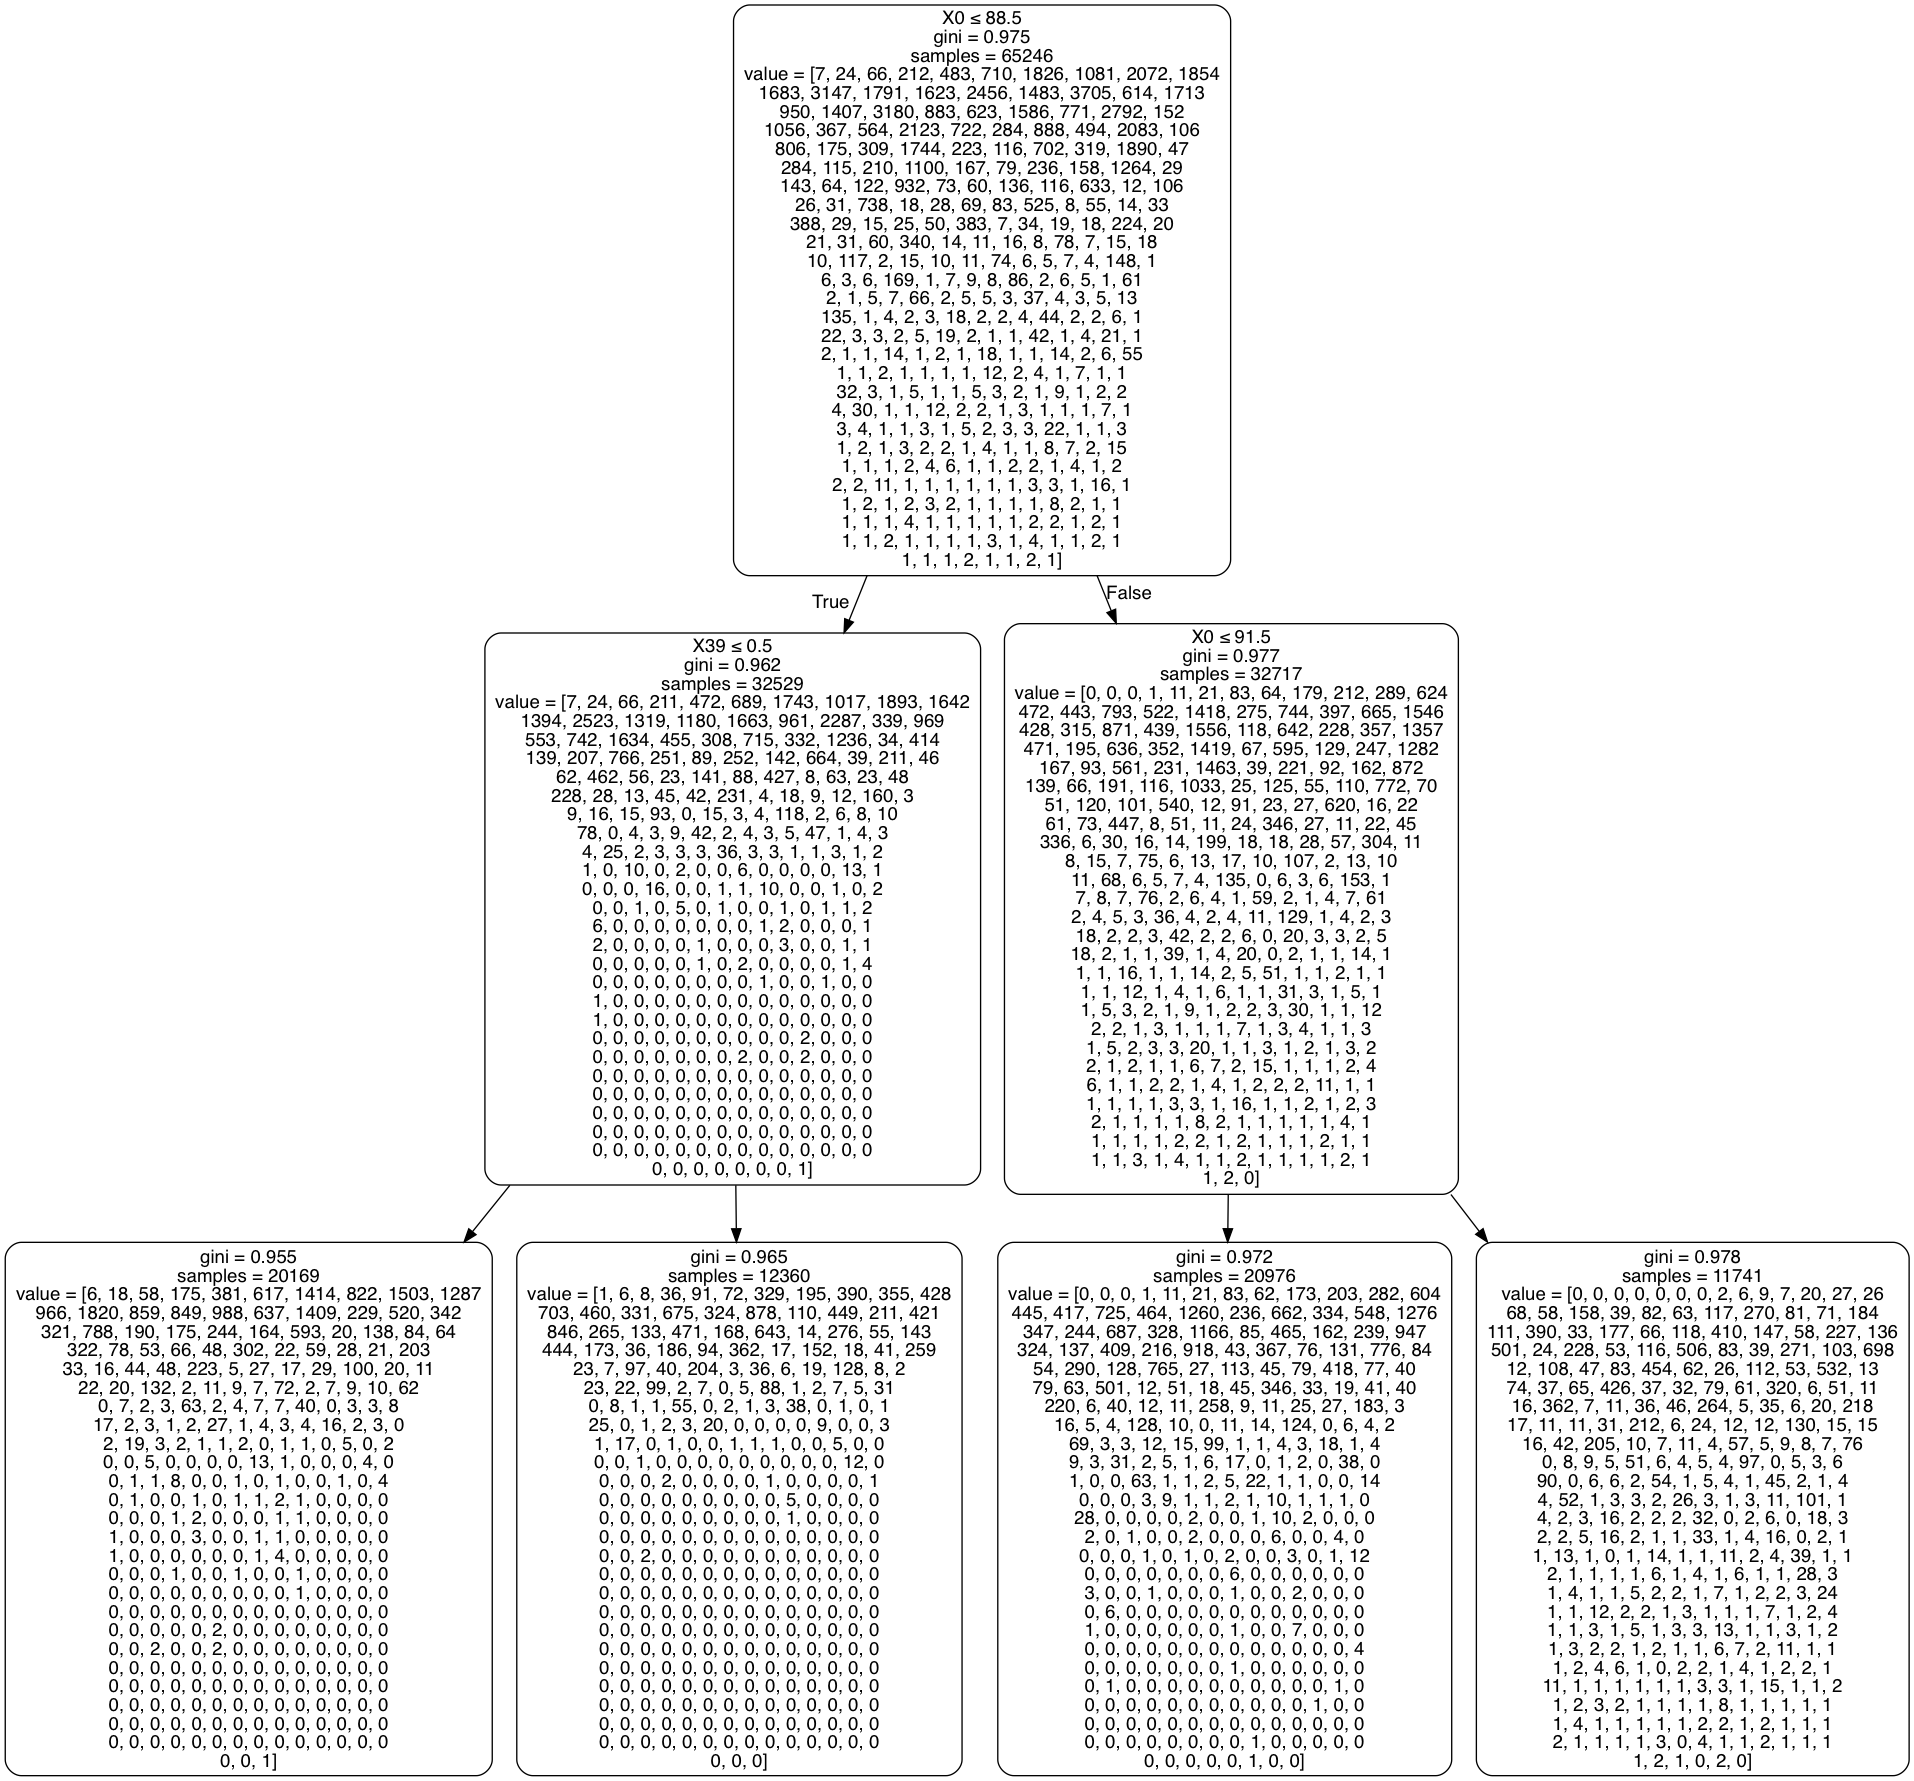

In [23]:
dot_data = StringIO()
export_graphviz(ctree, out_file=dot_data,  
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [24]:
clasPred = ctree.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, clasPred)

0.06945806768023541

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number 

[0.062362459199452824, 0.07066597933228427, 0.07588830546119323, 0.07905442957964702, 0.08058034890955576, 0.08208135599963236, 0.08615046347991942, 0.08772500251347741, 0.0878656909810421, 0.08886191545103085, 0.08843348451712824, 0.08783228110974088, 0.08707021543892819, 0.08767345163565413, 0.08744013853630618, 0.08680291549268365, 0.08705249150544869, 0.08705267319485048, 0.08684309892082183]


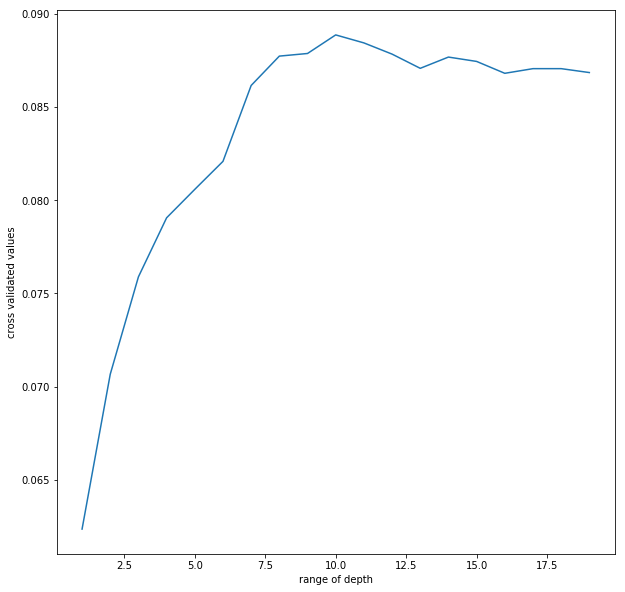

In [25]:
score = cross_val_score(ctree, X, y, cv = 10)
score.mean()
depth_range = range(1,20)
val = []
for depth in depth_range:
    ctree = DecisionTreeClassifier(max_depth = depth)
    depth_score = cross_val_score(ctree, X, y, cv = 10)
    val.append(depth_score.mean())
print(val)
plt.figure(figsize = (10,10))
plt.plot(depth_range, val)
plt.xlabel('range of depth')
plt.ylabel('cross validated values')
plt.show()